In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Chocolate Sales.csv')

In [3]:
data.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [4]:
data.tail()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
1089,Karlen McCaffrey,Australia,Spicy Special Slims,17-May-22,"$4,410",323
1090,Jehu Rudeforth,USA,White Choc,07-Jun-22,"$6,559",119
1091,Ches Bonnell,Canada,Organic Choco Syrup,26-Jul-22,$574,217
1092,Dotty Strutley,India,Eclairs,28-Jul-22,"$2,086",384
1093,Karlen McCaffrey,India,70% Dark Bites,23-May-22,"$5,075",344


In [5]:
data.columns

Index(['Sales Person', 'Country', 'Product', 'Date', 'Amount',
       'Boxes Shipped'],
      dtype='object')

In [6]:
data.shape

(1094, 6)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


In [8]:
cat_col=[i for i in data.columns if data[i].dtype=='O']

In [9]:
num_col=[i for i in data.columns if data[i].dtype!='O']

In [10]:
data[cat_col]

,Sales Person,Country,Product,Date,Amount
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320"
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896"
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501"
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726"
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685"
...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,17-May-22,"$4,410"
1090,Jehu Rudeforth,USA,White Choc,07-Jun-22,"$6,559"
1091,Ches Bonnell,Canada,Organic Choco Syrup,26-Jul-22,$574
1092,Dotty Strutley,India,Eclairs,28-Jul-22,"$2,086"


In [11]:
data[num_col]

,Boxes Shipped
0,180
1,94
2,91
3,342
4,184
...,...
1089,323
1090,119
1091,217
1092,384


In [12]:
data.memory_usage()

Index             128
Sales Person     8752
Country          8752
Product          8752
Date             8752
Amount           8752
Boxes Shipped    8752
dtype: int64

In [13]:
data.isnull().sum()

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

In [14]:
data.isnull().sum().sum()

0

In [15]:
data.duplicated().sum()

0

In [16]:
data.nunique()

Sales Person      25
Country            6
Product           22
Date             168
Amount           827
Boxes Shipped    385
dtype: int64

In [17]:
data['Country'].unique()

array(['UK', 'India', 'Australia', 'New Zealand', 'USA', 'Canada'],
      dtype=object)

In [18]:
data['Product'].unique()

array(['Mint Chip Choco', '85% Dark Bars', 'Peanut Butter Cubes',
       'Smooth Sliky Salty', '99% Dark & Pure', 'After Nines',
       '50% Dark Bites', 'Orange Choco', 'Eclairs', 'Drinking Coco',
       'Organic Choco Syrup', 'Milk Bars', 'Spicy Special Slims',
       'Fruit & Nut Bars', 'White Choc', 'Manuka Honey Choco',
       'Almond Choco', 'Raspberry Choco', 'Choco Coated Almonds',
       "Baker's Choco Chips", 'Caramel Stuffed Bars', '70% Dark Bites'],
      dtype=object)

In [19]:
data['Product'].value_counts()

50% Dark Bites          60
Eclairs                 60
Smooth Sliky Salty      59
White Choc              58
Drinking Coco           56
Spicy Special Slims     54
Organic Choco Syrup     52
After Nines             50
85% Dark Bars           50
Fruit & Nut Bars        50
Milk Bars               49
Peanut Butter Cubes     49
99% Dark & Pure         49
Almond Choco            48
Raspberry Choco         48
Orange Choco            47
Mint Chip Choco         45
Manuka Honey Choco      45
Caramel Stuffed Bars    43
70% Dark Bites          42
Baker's Choco Chips     41
Choco Coated Almonds    39
Name: Product, dtype: int64

In [20]:
data['Product'].value_counts().sum()

1094

In [21]:
data.describe()

,Boxes Shipped
count,1094.000000
mean,161.797989
std,121.544145
min,1.000000
25%,70.000000
50%,135.000000
75%,228.750000
max,709.000000


In [22]:
# Convert 'Amount' to numeric, automatically handling '$' and non-convertible values
data['Amount'] = pd.to_numeric(data['Amount'].str.replace('$', ''), errors='coerce')

# Verify conversion
print(data['Amount'].head())


0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Amount, dtype: float64


In [23]:
num_data=data.select_dtypes(include=['number'])
corr_matrix=num_data.corr()
print(corr_matrix)

                 Amount  Boxes Shipped
Amount         1.000000      -0.146411
Boxes Shipped -0.146411       1.000000


In [24]:
corr_matrix=data.corr()
print(corr_matrix)

                 Amount  Boxes Shipped
Amount         1.000000      -0.146411
Boxes Shipped -0.146411       1.000000


In [25]:
num_data.skew()

Amount          -0.030211
Boxes Shipped    1.112578
dtype: float64

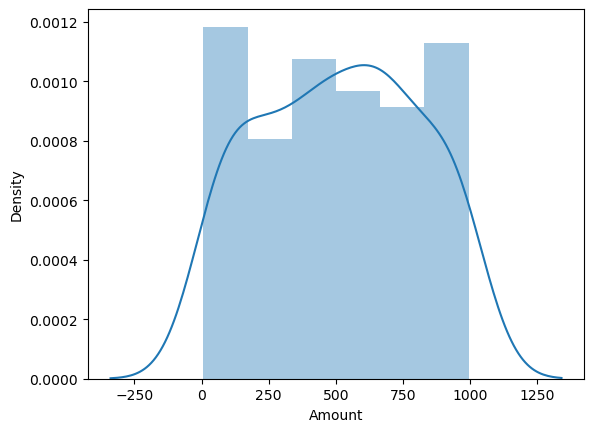

In [26]:
sns.distplot(data['Amount'])
plt.show()

In [27]:
data.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,NaN,180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,NaN,94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,NaN,91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,NaN,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,NaN,184


In [28]:
data['Avarge']=(data['Boxes Shipped']+data['Amount'])/2

In [29]:
data.groupby('Sales Person').count()

,Country,Product,Date,Amount,Boxes Shipped,Avarge
Sales Person,,,,,,
Andria Kimpton,39,39,39,5,39,5
Barr Faughny,43,43,43,2,43,2
Beverie Moffet,50,50,50,5,50,5
Brien Boise,53,53,53,6,53,6
Camilla Castle,32,32,32,3,32,3
Ches Bonnell,48,48,48,4,48,4
Curtice Advani,46,46,46,9,46,9
Dennison Crosswaite,49,49,49,7,49,7
Dotty Strutley,36,36,36,5,36,5


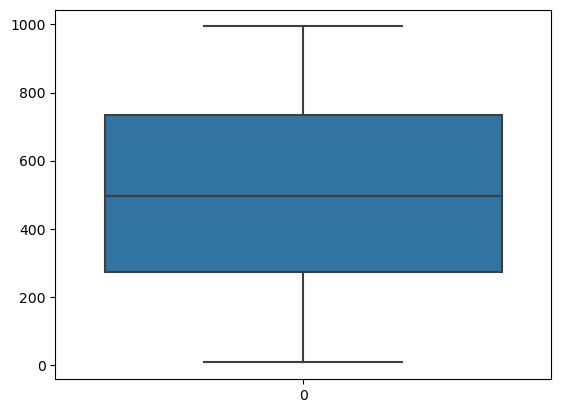

In [30]:
sns.boxplot(data=data['Amount'])
plt.show()

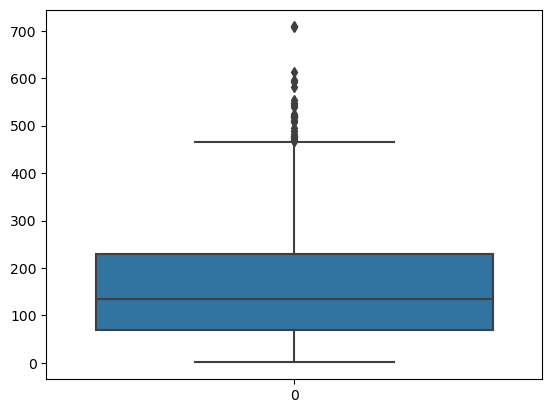

In [31]:
sns.boxplot(data=data['Boxes Shipped'])
plt.show()

In [32]:
q1=data['Amount'].quantile(0.25)

In [33]:
q3=data['Amount'].quantile(0.75)

In [34]:
IQR=q3-q1

In [36]:
upper_limit=q3+(1.5*IQR)
upper_limit
# Interpretation:

#     Any value in the Amount column greater than 1428.0 is considered an outlier based on the IQR method.
#    If your dataset has amounts higher than 1428.0, you might consider removing or handling those points as outliers.

1428.0

In [37]:
lower_limit=q1-(1.5*IQR)
lower_limit

-420.0

In [38]:
data

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Avarge
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,NaN,180,NaN
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,NaN,94,NaN
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,NaN,91,NaN
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,NaN,342,NaN
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,NaN,184,NaN
...,...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,17-May-22,NaN,323,NaN
1090,Jehu Rudeforth,USA,White Choc,07-Jun-22,NaN,119,NaN
1091,Ches Bonnell,Canada,Organic Choco Syrup,26-Jul-22,574.0,217,395.5
1092,Dotty Strutley,India,Eclairs,28-Jul-22,NaN,384,NaN


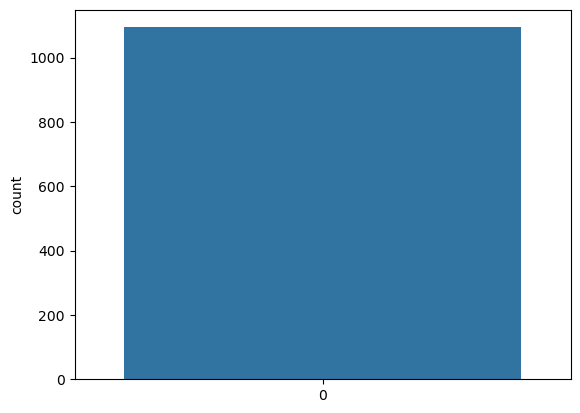

In [40]:
sns.countplot(data['Amount'])
plt.show()

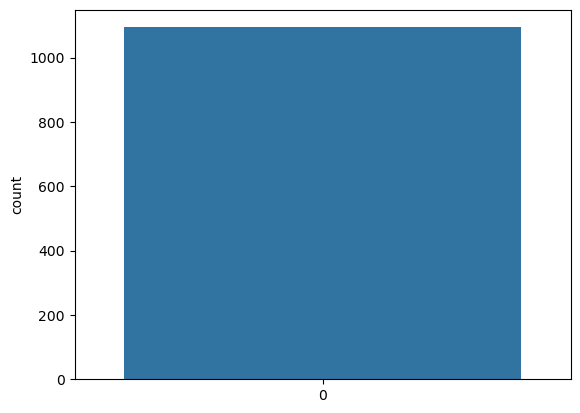

In [41]:
sns.countplot(data['Boxes Shipped'])
plt.show()

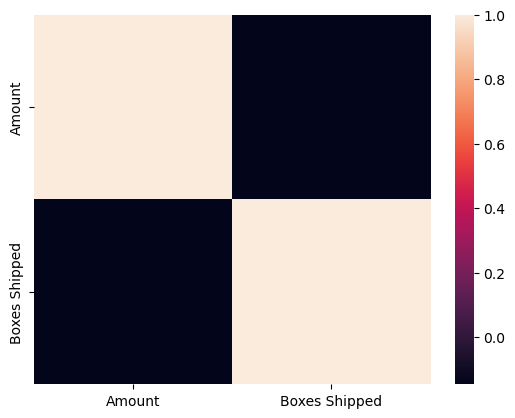

In [43]:
sns.heatmap(num_data.corr())
plt.show()

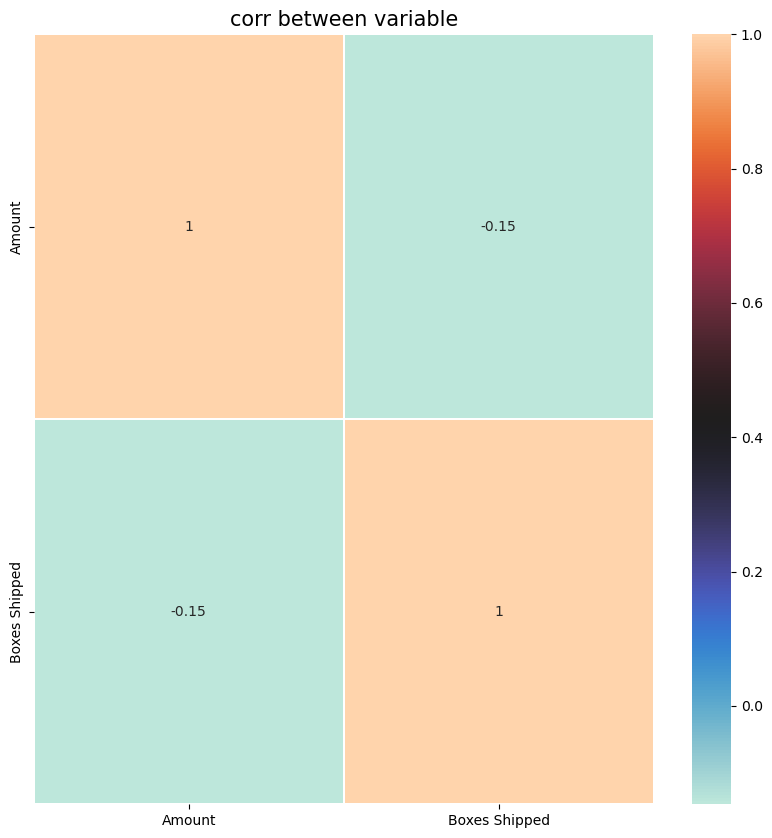

In [44]:
sns.heatmap(num_data.corr(),annot=True,cmap='icefire',linewidths=0.3)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title("corr between variable",color='black',size=15)
plt.show()

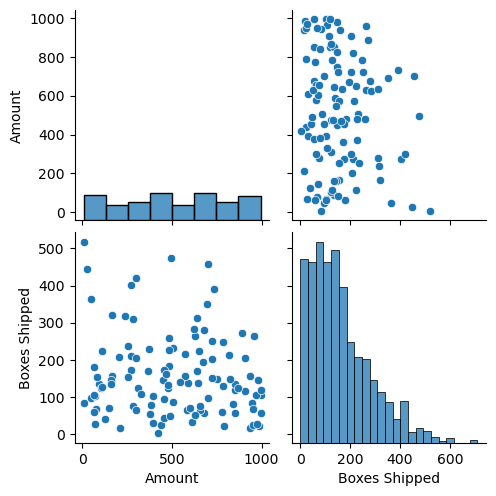

In [45]:
sns.pairplot(num_data)
plt.show()

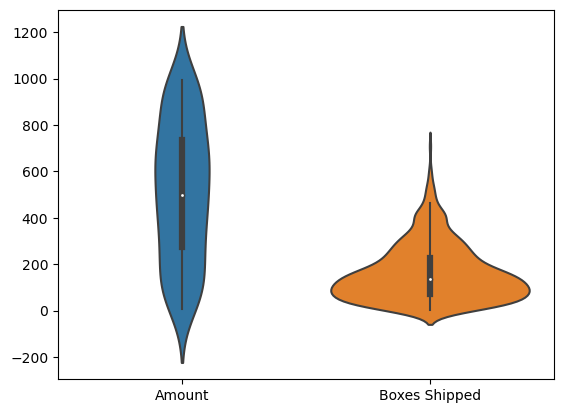

In [46]:
sns.violinplot(data=num_data)
plt.show()